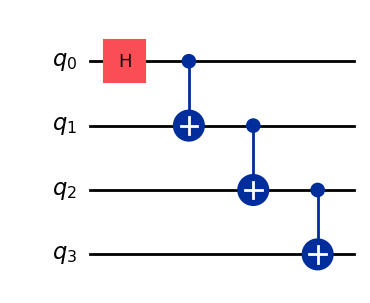

In [7]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(4)

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.cx(2,3)

qc.draw('mpl')

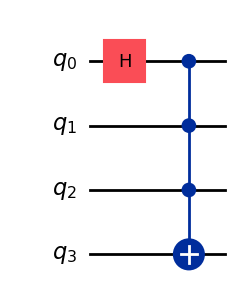

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate,MCXGate
#3 kontrollü kontrol qubiti ve bir hedef qubiti içerir
mcx_gate=MCXGate(3)
hadamard_gate=HGate()

qc=QuantumCircuit(4)
qc.append(hadamard_gate,[0])
qc.append(mcx_gate,[0,1,2,3])
qc.draw('mpl')
##MCXGate çok kontrollü X kapısı

TwoLocal devresi, tipik olarak bir dizi rotasyon kapısı ve iki qubit kapısından oluşur ve bunlar belirli bir tekrar sayısına göre bir araya getirilir

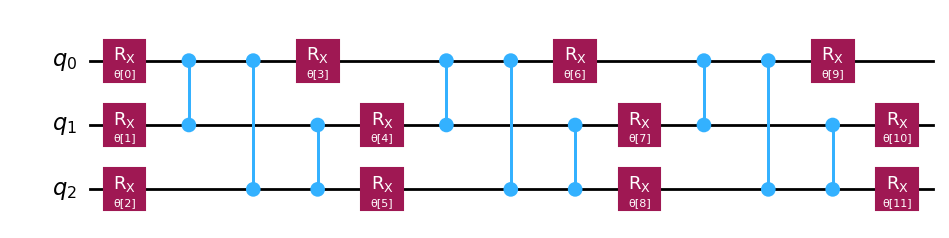

In [4]:
from qiskit.circuit.library import TwoLocal
two_local = TwoLocal(3, 'rx', 'cz')
two_local.decompose().draw('mpl')

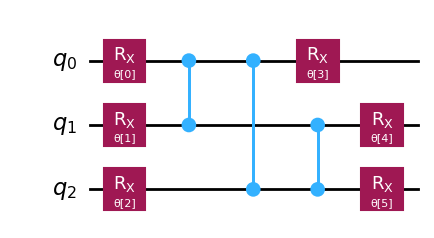

In [8]:
from qiskit.circuit.library import TwoLocal

# TwoLocal devresinin tanımlanması
two_local = TwoLocal(
    num_qubits=3,          # 3 qubitli devre
    rotation_blocks='rx',  # Tek qubit rotasyon kapıları RX
    entanglement_blocks='cz',  # İki qubit kapıları CZ
    reps=1,                # Tekrar sayısı
    entanglement='full'    # Full dolanıklık stratejisi
)

# Devrenin dekompozisyonu ve çizdirilmesi
two_local_decomposed = two_local.decompose()
two_local_decomposed.draw('mpl')


TwoLocal Devresi Nedir?
TwoLocal devresi, kuantum hesaplamada yerel iki qubit kapılarını ve tek qubit rotasyon kapılarını kullanarak parametrik kuantum devreleri oluşturmak için kullanılan bir devre şablonudur. Bu tür devreler, özellikle parametrik kapılar kullanarak kuantum algoritmalarını optimize etmede ve kuantum makine öğrenmesi gibi uygulamalarda sıkça kullanılır.
TwoLocal Devresinin Yapısı
TwoLocal devresi, belirli bir sayıda qubit için şu yapı taşlarından oluşur:
Tek Qubit Rotasyon Kapıları (Single Qubit Rotation Gates): Her bir qubit üzerinde uygulanan parametrik kapılar.
İki Qubit Kapıları (Two Qubit Gates): Qubit çiftleri arasında uygulanan kapılar.
Bu yapı taşları belirli bir tekrar (repetition) sayısı kadar uygulanır ve genellikle her tekrardan sonra parametreler optimize edilerek devrenin performansı iyileştirilir.
TwoLocal Parametreleri
TwoLocal devresi aşağıdaki parametrelerle yapılandırılır:
rotation_blocks: Tek qubit rotasyon kapıları türü (örneğin, 'rx', 'ry', 'rz').
entanglement_blocks: İki qubit kapıları türü (örneğin, 'cz', 'cx', 'crx').
Devrenin Yapısı
1. Tek Qubit Rotasyon Kapıları (RX)
Her bir qubit üzerinde RX kapıları uygulanır. Bu kapılar, qubitlerin belirli bir açı (parametre) ile döndürülmesini sağlar:
𝑅𝑋(𝜃)=exp(−𝑖𝜃2𝑋)RX(θ)=exp(−i 2θX)
2. İki Qubit Kapıları (CZ)
Qubit çiftleri arasında CZ (Controlled-Z) kapıları uygulanır. Bu kapılar, iki qubit arasında dolanıklık oluşturur ve kontrol qubit ∣1⟩∣1⟩ durumundayken hedef qubit'e Z (Pauli-Z) kapısı uygular:𝐶𝑍=(10000100001000−1)CZ=100001000010000−1 matris yapısı!
​
  
​
 


Rotasyon Kapıları: Qubit'in Bloch küresi üzerindeki durumunu belirli bir eksen etrafında döndürmek için kullanılır.
X, Y, Z Eksenleri: RX, RY ve RZ kapıları, sırasıyla X, Y ve Z eksenleri etrafında döndürme işlemi gerçekleştirir.
Parametrik Kapılar: Rotasyon kapıları genellikle parametrik kapılar olarak tanımlanır ve döndürme açısı parametre olarak belirlenir.
Kullanım Alanları: Kuantum algoritmaları ve kuantum devrelerinde qubit'lerin durumlarını kontrol etmek ve manipüle etmek için kullanılır.
Bloch Küresi
Bir qubit'in durumu, Bloch küresi adı verilen üç boyutlu bir küre üzerinde görselleştirilebilir.
Bloch küresi, kuantum durumlarının geometrik bir temsilidir. Herhangi bir qubit durumu, küre üzerinde bir nokta olarak temsil edilebilir.

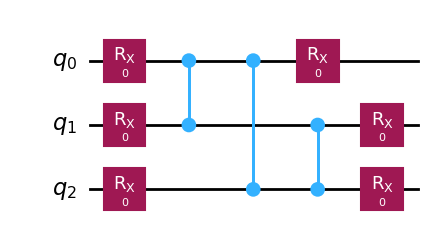

In [9]:
#  two_local devresindeki tüm parametrik kapıların parametrelerini 0 olarak atar.
# Bu, devredeki tüm rotasyon kapılarının açısının 0 derece olacağı anlamına gelir
bound_circuit = two_local.assign_parameters({ p: 0 for p in two_local.parameters})
#decompose: karmaşık kapıları daha basit  ve temele indirger
bound_circuit.decompose().draw('mpl')

 ZZFeatureMap, kuantum makine öğrenmesi uygulamalarında kullanılan bir özellik haritasıdır. 
 Özellik haritası, klasik verilerin kuantum devresine kodlanması için kullanılır.
 encoded: feature_map devresine belirli özellikleri atar. assign_parameters yöntemi, devredeki parametrik kapılara belirtilen özellikleri (parametreleri) atar. Bu işlem, devrenin belirli verilerle yapılandırılmasını sağlar.
 ZZFeatureMap: Qiskit'in bir sınıfıdır ve özellik haritası oluşturmak için kullanılır. Bu sınıf, ZZ etkileşim kapılarını kullanarak klasik verilerin kuantum devresine kodlanmasını sağlar.
feature_dimension=len(features): feature_dimension parametresi, devrede kaç tane özellik (feature) olacağını belirler. Bu özellik boyutu, klasik verilerinizin kaç boyutlu olduğunu ifade eder. Bu örnekte, features adlı liste [0.2, 0.4, 0.8] üç öğe içerir, bu nedenle özellik boyutu 3'tür.

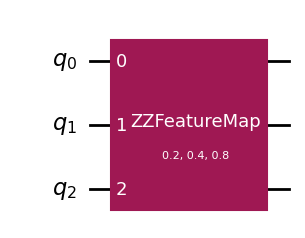

In [10]:
from qiskit.circuit.library import ZZFeatureMap
 
features = [0.2, 0.4, 0.8]
feature_map = ZZFeatureMap(feature_dimension=len(features))
 
encoded = feature_map.assign_parameters(features)
encoded.draw('mpl')

PauliEvolutionGate: Pauli bazında Hamiltonian evrimi gerçekleştirmek için kullanılan bir kuantum kapısıdır.
SparsePauliOp: Seyrek Pauli operatörlerini temsil eden bir sınıftır.
SparsePauliOp(["ZZI", "IZZ"]): Hamiltonian, iki Pauli-Z operatörünün çarpımı olan iki terimden oluşur. Bu terimler, qubitlerin belirli bir kombinasyonundaki etkileşimleri temsil eder.


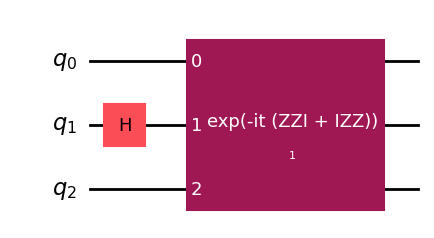

In [14]:
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
 
 
# Prepare an initial state with a Hadamard on the middle qubit
state = QuantumCircuit(3)
state.h(1)
 
hamiltonian = SparsePauliOp(["ZZI", "IZZ"])
#Hamiltonian altında 1 birim zaman için evrim gerçekleştirecek bir kapı oluşturur.
evolution = PauliEvolutionGate(hamiltonian, time=1)

# Bu satır, başlangıç durumuna evolution kapısını ekler ve devrenin yerinde evrim geçirmesini sağlar
state.compose(evolution, inplace=True)
 
state.draw('mpl')

Karşılaştırmalı devreler, donanımımızın ne kadar iyi çalıştığına dair bir fikir verir ve karmaşıklık teorisi devreleri, çözmek istediğimiz problemlerin ne kadar zor olduğunu anlamamıza yardımcı olur.
 "kuantum hacmi" kıyaslaması, bir kuantum bilgisayarının bir tür rastgele kuantum devresini ne kadar doğru bir şekilde yürüttüğünü ölçer.
 decompose() Yönteminin İşleyişi
Amaç: Daha karmaşık veya yüksek seviyeli kuantum kapılarını ve devrelerini, kuantum bilgisayarının doğrudan uygulayabileceği temel kuantum kapılarına ayrıştırmak.

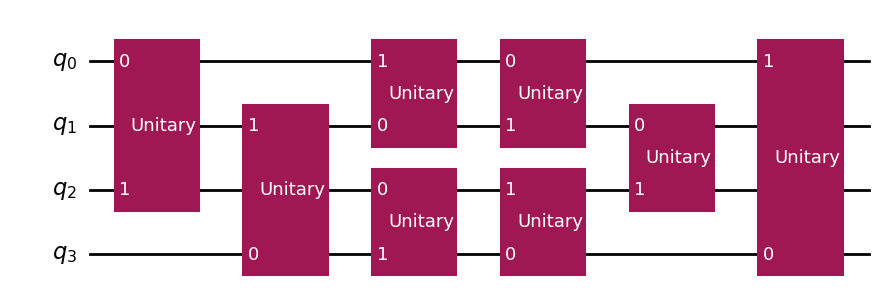

In [15]:
from qiskit.circuit.library import QuantumVolume
QuantumVolume(4).decompose().draw('mpl')

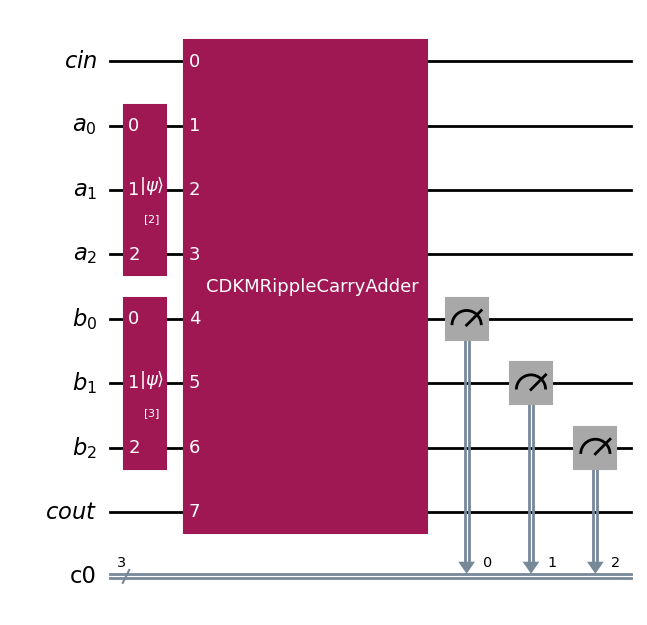

In [16]:
#Aritmetik işlemlere bir örnek iki üç bitlik sayıyı toplama
from qiskit.circuit.library import CDKMRippleCarryAdder
adder = CDKMRippleCarryAdder(3)  # 3 bitlik 2 qubit oluşturmaa
 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
 
#a oluşturma
reg_a = QuantumRegister(3, 'a')
number_a = QuantumCircuit(reg_a)
number_a.initialize(2) # Number 2; |010>
 
reg_b = QuantumRegister(3, 'b')
number_b = QuantumCircuit(reg_b)
number_b.initialize(3)  # Number 3; |011>
 

reg_result = ClassicalRegister(3)
circuit = QuantumCircuit(*adder.qregs, reg_result)
 

circuit = circuit.compose(number_a, qubits=reg_a).compose(number_b, qubits=reg_b).compose(adder)
circuit.measure(reg_b, reg_result)
circuit.draw('mpl')

In [17]:
from qiskit.primitives import Sampler
 
result = Sampler().run(circuit).result()
result.quasi_dists[0]

{5: np.float64(1.0)}